# Numpy -- Fortsetzung

## Wiederholung von letzter Vorlesung

TODO

## Weitere Beispiele

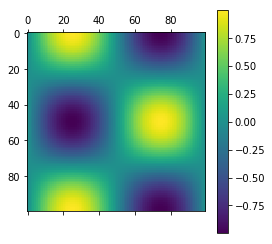

In [63]:
import numpy as np
import matplotlib.pyplot as plt

plt.figure(figsize=(10,10))

a = np.zeros(shape=(100,100))

x = np.linspace(0.0, 2* np.pi, 100)
y = np.linspace(0.0, 2* np.pi, 100)

x_pos = 0
for i in x:
    y_pos=0
    for j in y:
        a[x_pos, y_pos] = np.cos(i)*np.sin(j)
        y_pos += 1
    x_pos += 1
      
plt.matshow(a)
plt.colorbar()

plt.show()

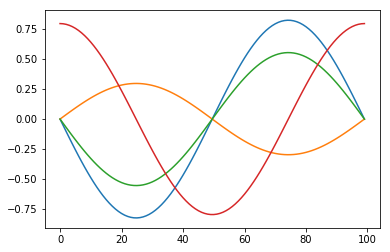

In [64]:
plt.plot(a[40,:])
plt.plot(a[20,:])
plt.plot(a[65,:])
plt.plot(a[:,35])
plt.show()

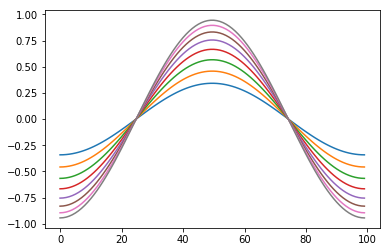

In [65]:
plt.plot(a[:,55:70:2])
plt.show()

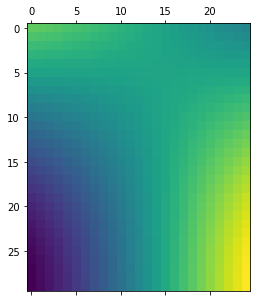

In [66]:
plt.matshow(a[20:50,35:60])
plt.show()

## Fancy Indexing und Maskierung

Fancy Indexing (zu deutsch etwa "ausgefallene Indizierung") und Maskierung sind zwei weitere geschickte Methoden bestimmte Elemente aus einem `numpy`-Array zu extrahieren.

### Fancy Indexing

Fancy Indexing kann verwendet werden um bestimmte Elemente aus einem Array zu extrahieren. Dazu muss ein weiterer `numpy`-Array angelegt werden, welcher die __Indices der zu extrahierenden Elemente__ enthält. Hier muss wieder beachtet werden, dass die Nummerierung der Indices eines Arrays bei __0__ beginnt!

Im folgenden Beispiel wird ein Array `x` mit den Zahlen 1 bis 10 angelegt. Aus diesem sollen nur bestimmte Zahlen extrahiert werden. Dazu wird der Array `ind` definiert, der die Indices dieser Elemente enthält. Die Teil-Liste wird dann extrahiert, indem der Befehl

    b = x[ind]
    
eingegeben wird. Hierbei ist `b` die neue Teil-Liste.

In [ ]:
import numpy as np

x = np.arange(1, 10, 1)
print(x)
ind = np.array([0, 2, 3, 7]) # indices of elements we would like to extract
b = x[ind]
print(b)

### Indexing mit einem boolschen Array

Eine weitere Möglichkeit bestimmte Elemente auszuwählen kann über einen Array, welcher nur _boolsche Variablen_, also `True` oder `False` enthält, gemacht werden. Hier wird ein Array benötigt, der dieselbe Größe wie der Ursprungsarray hat. Jedem Element des Arrays `x` wird so ein Element des Arrays `ind` zugewiesen. Nur wenn das entsprechende Element `True` enthält, wird es als Element des neuen Teil-Arrays `b` ausgegeben.

In [ ]:
# Note that boolean-indexing is usually never done explicitely
# but indirectly via masking (see below). We show the explicit
# boolean masking for demonstration purposes here.
import numpy as np

x = np.arange(1, 5, 1)
print(x)
# we access indices that are 'True' in a boolean array
# of the same size as x:
ind = np.array([True, False, True, True])
b = x[ind]
print(b)

### Maskierung

Maskierung kann für Fälle verwendet werden, in denen nur Elemente, die eine bestimmte Bedingung erfüllen ausgewählt werden sollen. Das kann z.B. notwendig sein, wenn man den Logarithmus der Elemente berechnen will und dazu alle Elemente auswählen muss, welche größer als 0 sind. Die _Maske_ ist dabei eine einfache Bedingung wie z.B. ` y = (x > 0)`. Die Maske wird dann analog zu oben über 

    y = x[mask1]
    
auf den Ursprungsarray `x` angewendet um das Teil-Array `y` zu erhalten.    


Im untenstehenden Beispiel wird ein `numpy`-Array über die Funktion `randint()` erzeugt. Diese Funktion erzeugt Zufallszahlen. Der Aufruf ist der folgende

    x = nr.randint(start, end, number)
    
wobei die Anzahl an Zufallszahlen (`number`) zwischen den Werten `start` und `end` erzeugt werden sollen. Anschließend werden verschiedene Masken definiert und auf das Array angewendet.

In [ ]:
import numpy as np
import numpy.random as nr

x = nr.randint(-10, 10, 10)
print('Ursprungsarray mit Zufallszahlen: ', x)
mask1 = (x > 0)  # mask is a bool array
y = x[mask1]     # extract the values from x where mask = True
print('Alle Werte groesser als 0: ',y)
mask2 = (x > 0) & (x < 4)  # combined mask (and condition)
mask3 = (x < -5) | ( x > 5) # combined mask (or condition)
print('Alle Werte zwischen 0 und 4: ', x[mask2])
print('Alle Werte kleiner -5 oder groesser als +5: ', x[mask3])

## Wichtige Bemerkungen

- Im Gegensatz zu dem Zerschneiden von Arrays werde beim Fancy Indexing und bei der Maskierung immer Kopien des Ursprungsarray zurückgegeben. Dies ist ein Unterschied zu den Standard-Listen von Python! Hier werden beim Zerschneiden von Listen auch immer Kopien zurückgegeben!


In [ ]:
import numpy as np

a = np.arange(0, 11, 1)

b = a[::2] # get each second number of a
print('Teil-Liste b: ',b)

# create the 'same' array with fancy indexing:
c = a[np.array([0, 2, 4, 6, 8, 10])]
print('Teil-Liste c: ',c)

# create again the 'same' array with masking:
d = a[a%2 == 0]
print('Teil-Liste d: ',d)

# only a modification in b also modifies a!
b[0] = 5
print('Ursprungsliste: ', a, 'Teil-Liste b: ', b)

c[1] = 100
print('Ursprungsliste: ', a,'Teil-Liste c: ', c)

d[2] = 1000
print('Ursprungsliste: ', a,'Teil-Liste d: ', d)

- Sowohl Fancy Indexing, als auch Maskierung kann auch auf der __linken Seite__ einer Zuweisung verwendet werden. Es muss nicht als Extra-Befehl ausgeführt werden.

In [ ]:
import numpy as np

a = np.arange(0, 11, 1)
print(a)
ind = np.array([0, 2, 4])
a[ind] = 1000
print(a)

b = np.arange(0, 11, 1)
print(b)
b[b%2 == 0] = 1000
print(b)

# Funktionen